In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

In [17]:
data = pd.read_csv('drive/MyDrive/data/data5.csv')
df = pd.DataFrame(data)
X = df[df.columns[~df.columns.isin(['weight','RESILIENCE'])]]
Y = df['RESILIENCE']
x_train, x_test, y_train, y_test = train_test_split(X, Y.astype('float'), test_size=0.20, random_state=53)

In [16]:
tr_regressor = DecisionTreeRegressor(max_depth=5,random_state=53)
tr_regressor.fit(x_train,y_train)
score_train = tr_regressor.score(x_train,y_train)
pred_tr = tr_regressor.predict(x_test)
score_test = decision_score=tr_regressor.score(x_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [5]:
print("Decision tree  Regression Model Score on training set is ",score_train)
print("Decision tree  Regression Model Score on testing set is ",score_test)

Decision tree  Regression Model Score on training set is  0.21807897347108862
Decision tree  Regression Model Score on testing set is  0.2037917790483066


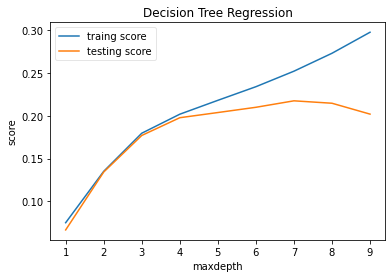

In [ ]:
training_scores=[]
testing_scores=[]
depths = 10
for depth in range(1,depths):
    regr = DecisionTreeRegressor(max_depth=depth)
    regr.fit(x_train, y_train)
    training_scores.append(regr.score(x_train,y_train))
    testing_scores.append(regr.score(x_test,y_test))

fig=plt.figure()
depths=np.arange(1,depths)
ax=fig.add_subplot(1,1,1)
ax.plot(depths,training_scores,label="traing score")
ax.plot(depths,testing_scores,label="testing score")
ax.set_xlabel("maxdepth")
ax.set_ylabel("score")
ax.set_title("Decision Tree Regression")
ax.legend(framealpha=0.5)
plt.show()

K-fold Cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

params = {"splitter":("best", "random"), "max_depth": range(1, 10)}
tr_regressor = DecisionTreeRegressor(random_state=53)
scores = cross_val_score(tr_regressor, x_train, y_train, cv=5, n_jobs=1)

print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [-0.53254699 -0.51113579 -0.53516811 -0.51517757 -0.54383284]
Cross Validation accuracy: -0.528 +/- 0.012


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(tr_regressor, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = tr_regressor.predict(x_train)
        tr_regressor_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{tr_regressor_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = tr_regressor.predict(x_test)
        tr_regressor_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{tr_regressor_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
from sklearn.model_selection import GridSearchCV
params = {"splitter":("best", "random"), "max_depth": range(1, 10)}
tree_cv = GridSearchCV(tr_regressor, params, scoring="accuracy", cv=5, n_jobs=-1, verbose=True)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")
tr_regressor = DecisionTreeRegressor(**best_params)
tr_regressor.fit(x_train, y_train)
print_score(tr_regressor, x_train, y_train, x_test, y_test, train=True)
print_score(tr_regressor, x_train, y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best paramters: {'max_depth': 1, 'splitter': 'best'})


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


ValueError: ignored

In [ ]:
#tree_cv.best_params_

{'max_depth': 7, 'max_features': 7, 'splitter': 'best'}

In [ ]:
#tree_cv.best_score_

0.21456806682536342

In [ ]:
#tree_cv.predict(x_test)

array([-0.36884502,  0.40809412, -0.48258258, ...,  0.04930291,
       -0.48258258, -0.36884502])

In [ ]:
# accuracy_score(y_holdout, tree_grid.predict(X_holdout)) 

In [ ]:
#tree.score(tree_cv.predict(x_test), y_test)